<a href="https://colab.research.google.com/github/itssJuann/ARBOL_COLOMBIA/blob/main/ARBOL_COLOMBIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sortedcontainers


In [ ]:
!pip install graphviz

In [ ]:
# Instala las dependencias requeridas (solo si no están ya instaladas)
!sudo apt-get install -y graphviz libgraphviz-dev pkg-config

# Luego, intenta instalar pygraphviz
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jamm

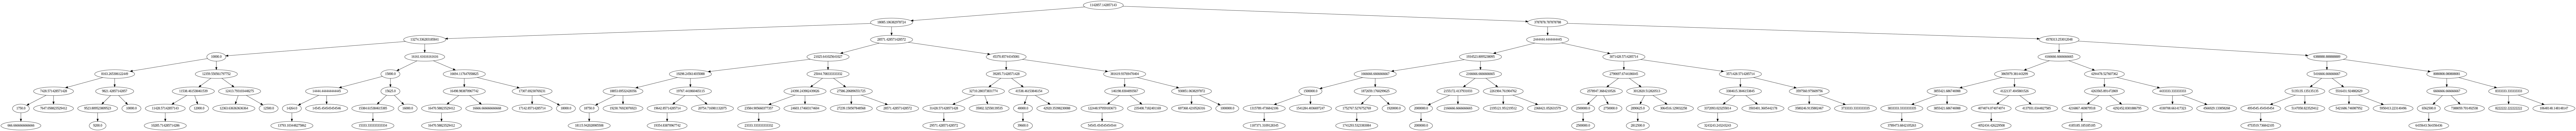

In [ ]:
import pandas as pd
import pygraphviz as pgv
from PIL import Image
from IPython.display import display


data = pd.read_csv('co_properties_final.csv')

# Crear una lista de tuplas ordenadas (metrica, inmueble).
sorted_inmuebles_list = []

# Recorrer el DataFrame y agregar las tuplas a la lista.
for index, row in data.iterrows():
    metrica = row['price'] / row['surface_total']
    inmueble = {
        'title': row['title'],
        'department': row['department'],
        'city': row['city'],
        'property_type': row['property_type'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'surface_total': row['surface_total'],
        'surface_covered': row['surface_covered'],
        'bedrooms': row['bedrooms'],
        'bathrooms': row['bathrooms'],
        'operation_type': row['operation_type'],
        'price': row['price'],
    }
    sorted_inmuebles_list.append((metrica, inmueble))

# Ordenar la lista por la métrica.
sorted_inmuebles_list.sort(key=lambda x: x[0])

# Crear un árbol binario balanceado a partir de la lista ordenada.
class TreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.height = 1

def build_balanced_bst(sorted_list):
    if not sorted_list:
        return None

    mid_idx = len(sorted_list) // 2
    root_key, root_value = sorted_list[mid_idx]
    root = TreeNode(root_key, root_value)

    root.left = build_balanced_bst(sorted_list[:mid_idx])
    root.right = build_balanced_bst(sorted_list[mid_idx + 1:])

    return root

root_node = build_balanced_bst(sorted_inmuebles_list)

node_counter = 0

def generate_dot_tree(tree_node, dot=None):
    global node_counter

    if dot is None:
        dot = pgv.AGraph(strict=False, directed=True)

    if tree_node:
        # Utiliza un identificador único para cada nodo.
        node_id = f"node_{node_counter}"
        node_counter += 1

        dot.add_node(node_id, label=str(tree_node.key))
        if tree_node.left:
            dot.add_node(f"node_{node_counter}", label=str(tree_node.left.key))
            dot.add_edge(node_id, f"node_{node_counter}")
            generate_dot_tree(tree_node.left, dot)
        if tree_node.right:
            dot.add_node(f"node_{node_counter}", label=str(tree_node.right.key))
            dot.add_edge(node_id, f"node_{node_counter}")
            generate_dot_tree(tree_node.right, dot)

    return dot





# Generar el gráfico DOT del árbol binario en forma de árbol.
dot_tree = generate_dot_tree(root_node)

# Renderizar el gráfico y mostrarlo en el cuaderno.
dot_tree.layout(prog='dot')
dot_tree.draw('binary_tree.png')

# Mostrar la imagen del árbol binario.
img = Image.open('binary_tree.png')
display(img)


In [ ]:
##### Insertar un nuevo nodo en el árbol #####

def get_height(node):
    if node is None:
        return 0
    return node.height

def update_height(node):
    node.height = max(get_height(node.left), get_height(node.right)) + 1

def balance_factor(node):
    if node is None:
        return 0
    return get_height(node.left) - get_height(node.right)

def rotate_left(node):
    right_child = node.right
    node.right = right_child.left
    right_child.left = node
    update_height(node)
    update_height(right_child)
    return right_child

def rotate_right(node):
    left_child = node.left
    node.left = left_child.right
    left_child.right = node
    update_height(node)
    update_height(left_child)
    return left_child

def show_tree(root_node):
    dot_tree = generate_dot_tree(root_node)
    dot_tree.layout(prog='dot')
    dot_tree.draw('binary_tree.png')
    img = Image.open('binary_tree.png')
    display(img)


def insert_node(root, key, value):
    if root is None:
        return TreeNode(key, value)

    if key < root.key:
        root.left = insert_node(root.left, key, value)
    else:
        root.right = insert_node(root.right, key, value)

    update_height(root)

    balance = balance_factor(root)

    if balance > 1:
        if key < root.left.key:
            return rotate_right(root)
        else:
            root.left = rotate_left(root.left)
            return rotate_right(root)
    if balance < -1:
        if key > root.right.key:
            return rotate_left(root)
        else:
            root.right = rotate_right(root.right)
            return rotate_left(root)

    return root

def obtener_atributos_inmueble():
    print("Ingrese los atributos del inmueble:")
    title = input("Título: ")
    department = input("Departamento: ")
    city = input("Ciudad: ")
    property_type = input("Tipo de propiedad: ")
    latitude = float(input("Latitud: "))
    longitude = float(input("Longitud: "))
    surface_total = float(input("Área total: "))
    surface_covered = float(input("Área cubierta: "))
    bedrooms = int(input("Número de dormitorios: "))
    bathrooms = int(input("Número de baños: "))
    operation_type = input("Tipo de operación: ")
    price = float(input("Precio: "))

    metrica = price / surface_total
    inmueble = {
        'title': title,
        'department': department,
        'city': city,
        'property_type': property_type,
        'latitude': latitude,
        'longitude': longitude,
        'surface_total': surface_total,
        'surface_covered': surface_covered,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'operation_type': operation_type,
        'price': price,
    }

    return metrica, inmueble

# Ejemplo de uso:
metrica, new_value = obtener_atributos_inmueble()
root_node = insert_node(root_node, metrica, new_value)

# Mostrar el árbol después de la inserción
show_tree(root_node)

Ingrese los atributos del inmueble:


Ingrese la clave del nodo que desea eliminar: 1


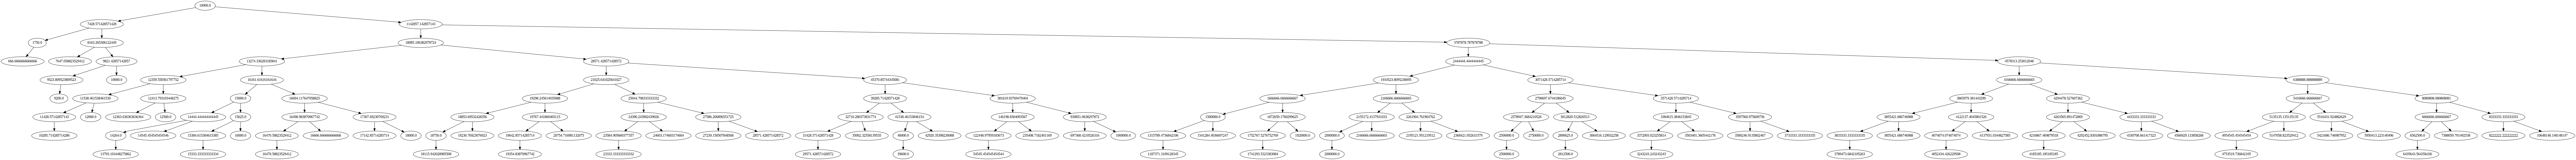

In [ ]:
#### Eliminar un Nodo ####

def eliminar_nodo(root, key):
    if root is None:
        return root

    # Buscar el nodo a eliminar.
    if key < root.key:
        root.left = eliminar_nodo(root.left, key)
    elif key > root.key:
        root.right = eliminar_nodo(root.right, key)
    else:
        # Caso 1: El nodo tiene un hijo o ninguno.
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left

        # Caso 2: El nodo tiene dos hijos. Encontrar el sucesor in-order.
        sucesor = encontrar_sucesor(root.right)
        root.key = sucesor.key
        root.value = sucesor.value
        root.right = eliminar_nodo(root.right, sucesor.key)

    update_height(root)

    balance = balance_factor(root)

    if balance > 1:
        if balance_factor(root.left) >= 0:
            return rotate_right(root)
        else:
            root.left = rotate_left(root.left)
            return rotate_right(root)
    if balance < -1:
        if balance_factor(root.right) <= 0:
            return rotate_left(root)
        else:
            root.right = rotate_right(root.right)
            return rotate_left(root)

    return root

def encontrar_sucesor(node):
    while node.left is not None:
        node = node.left
    return node


# Función para eliminar un nodo ingresado por el usuario y mostrar el árbol actualizado.
def eliminar_nodo_por_usuario(root):
    clave_eliminar = float(input("Ingrese la clave del nodo que desea eliminar: "))
    root = eliminar_nodo(root, clave_eliminar)
    show_tree(root)
    return root

# Ejemplo de uso:
root_node = eliminar_nodo_por_usuario(root_node)



In [ ]:
###### Función para buscar un nodo y mostrar información específica sobre ese nodo.  #####

def buscar_nodo_y_mostrar_informacion(root):
    clave_buscar = float(input("Ingrese la clave del nodo que desea buscar: "))

    # Función auxiliar para buscar un nodo con una clave específica.
    def buscar_nodo(root, clave):
        if root is None:
            return None
        if clave == root.key:
            return root
        elif clave < root.key:
            return buscar_nodo(root.left, clave)
        else:
            return buscar_nodo(root.right, clave)

    nodo_buscado = buscar_nodo(root, clave_buscar)

    if nodo_buscado is None:
        print("El nodo no se encontró en el árbol.")
        return

    opcion = input("Elija la información que desea ver (nivel/factores de balanceo/padre/abuelo/tío): ").strip().lower()

    for atributo, valor in nodo_buscado.value.items():
            print(f"{atributo}: {valor}")

    if opcion == 'nivel':
        nivel = obtener_nivel(root, nodo_buscado.key)
        print(f"Nivel del nodo: {nivel}")
    elif opcion == 'factores de balanceo':
        factor_balance = balance_factor(nodo_buscado)
        print(f"Factor de balanceo del nodo: {factor_balance}")
    elif opcion == 'padre':
        padre = encontrar_padre(root, nodo_buscado)
        if padre:
            print(f"Padre del nodo: {padre.key}")
        else:
            print("El nodo buscado es la raíz del árbol y no tiene padre.")
    elif opcion == 'abuelo':
        abuelo = encontrar_abuelo(root, nodo_buscado)
        if abuelo:
            print(f"Abuelo del nodo: {abuelo.key}")
        else:
            print("El nodo buscado es la raíz del árbol o no tiene abuelo.")
    elif opcion == 'tío':
        tio = encontrar_tio(root, nodo_buscado)
        if tio:
            print(f"Tío del nodo: {tio.key}")
        else:
            print("El nodo buscado es la raíz del árbol o no tiene tío.")
    else:
        print("Opción no válida.")

# Función auxiliar para encontrar el nivel de un nodo.
def obtener_nivel(root, key, level=1):
    if root is None:
        return 0
    if key == root.key:
        return level
    if key < root.key:
        return obtener_nivel(root.left, key, level + 1)
    return obtener_nivel(root.right, key, level + 1)

# Función auxiliar para encontrar el padre de un nodo.
def encontrar_padre(root, node):
    if root is None or node is None:
        return None
    if root.left == node or root.right == node:
        return root
    if node.key < root.key:
        return encontrar_padre(root.left, node)
    return encontrar_padre(root.right, node)

# Función auxiliar para encontrar el abuelo de un nodo.
def encontrar_abuelo(root, node):
    padre = encontrar_padre(root, node)
    if padre:
        return encontrar_padre(root, padre)
    return None

# Función auxiliar para encontrar el tío de un nodo.
def encontrar_tio(root, node):
    padre = encontrar_padre(root, node)
    if padre:
        if padre.left == node:
            return padre.right
        elif padre.right == node:
            return padre.left
    return None

# Ejemplo de uso:
buscar_nodo_y_mostrar_informacion(root_node)


Ingrese la clave del nodo que desea buscar: 1
El nodo no se encontró en el árbol.


In [ ]:
#### Función para buscar nodos que cumplan con los requisitos especificados por el usuario. ####

def buscar_nodos_por_requisitos(root):
    print("Especifique los requisitos para buscar nodos (hasta 3 atributos):")

    requisitos = {}
    for i in range(1, 4):
        atributo = input(f"Atributo {i} (deje en blanco para terminar): ").strip()
        if not atributo:
            break
        valor = input(f"Valor para {atributo}: ").strip()
        requisitos[atributo] = valor

    nodos_cumplen_requisitos = []
    buscar_nodos_con_requisitos(root, requisitos, nodos_cumplen_requisitos)

    if not nodos_cumplen_requisitos:
        print("No se encontraron nodos que cumplan con los requisitos especificados.")
        return

    print("\nNodos que cumplen con los requisitos:")
    for i, nodo in enumerate(nodos_cumplen_requisitos, start=1):
        print(f"{i}: Clave: {nodo.key}")
        for atributo, valor in nodo.value.items():
            print(f"   {atributo}: {valor}")

    opcion = input("Elija un nodo del cual desea ver información específica (indice del nodo o 'salir'): ").strip()

    if opcion == 'salir':
        return

    try:
        indice_nodo_seleccionado = int(opcion) - 1
        if 0 <= indice_nodo_seleccionado < len(nodos_cumplen_requisitos):
            nodo_seleccionado = nodos_cumplen_requisitos[indice_nodo_seleccionado]
            mostrar_informacion_nodo_seleccionado(nodo_seleccionado)
        else:
            print("Opción no válida.")
    except ValueError:
        print("Opción no válida.")

# Función auxiliar para mostrar información específica de un nodo.
def mostrar_informacion_nodo_seleccionado(nodo):
    opcion = input("Elija la información que desea ver (nivel/factores de balanceo/padre/abuelo/tío/atributos): ").strip()

    if opcion == 'nivel':
        nivel = obtener_nivel(root_node, nodo.key)
        print(f"Nivel del nodo: {nivel}")
    elif opcion == 'factores de balanceo':
        factor_balance = balance_factor(nodo)
        print(f"Factor de balanceo del nodo: {factor_balance}")
    elif opcion == 'padre':
        padre = encontrar_padre(root_node, nodo)
        if padre:
            print(f"Padre del nodo: {padre.key}")
        else:
            print("El nodo buscado es la raíz del árbol y no tiene padre.")
    elif opcion == 'abuelo':
        abuelo = encontrar_abuelo(root_node, nodo)
        if abuelo:
            print(f"Abuelo del nodo: {abuelo.key}")
        else:
            print("El nodo buscado es la raíz del árbol o no tiene abuelo.")
    elif opcion == 'tío':
        tio = encontrar_tio(root_node, nodo)
        if tio:
            print(f"Tío del nodo: {tio.key}")
        else:
            print("El nodo buscado es la raíz del árbol o no tiene tío.")

    else:
        print("Opción no válida.")

# Ejemplo de uso:
buscar_nodos_por_requisitos(root_node)


Especifique los requisitos para buscar nodos (hasta 3 atributos):
Atributo 1 (deje en blanco para terminar): 


NameError: ignored

In [ ]:
# ... Tu código anterior ...

# Función para realizar un recorrido in-order del árbol e imprimir cada nodo visitado.
def recorrido_inorder(root):
    if root is not None:
        # Recorre el subárbol izquierdo.
        recorrido_inorder(root.left)

        # Imprime el nodo actual.
        print(f"Clave: {root.key}")


        # Recorre el subárbol derecho.
        recorrido_inorder(root.right)

# Ejemplo de uso:
print("Recorrido In-Order del Árbol:")
recorrido_inorder(root_node)


Recorrido In-Order del Árbol:
Clave: 666.6666666666666
Clave: 1750.0
Clave: 7428.571428571428
Clave: 7647.058823529412
Clave: 8163.265306122449
Clave: 9200.0
Clave: 9523.809523809523
Clave: 9821.42857142857
Clave: 10000.0
Clave: 10000.0
Clave: 10285.714285714286
Clave: 11428.57142857143
Clave: 11538.461538461539
Clave: 12000.0
Clave: 12359.550561797752
Clave: 12363.636363636364
Clave: 12413.793103448275
Clave: 12500.0
Clave: 13274.336283185841
Clave: 13793.103448275862
Clave: 14264.0
Clave: 14444.444444444445
Clave: 14545.454545454546
Clave: 15000.0
Clave: 15333.333333333334
Clave: 15384.615384615385
Clave: 15625.0
Clave: 16000.0
Clave: 16161.61616161616
Clave: 16470.58823529412
Clave: 16470.58823529412
Clave: 16498.983870967742
Clave: 16666.666666666668
Clave: 16694.117647058825
Clave: 17142.85714285714
Clave: 17307.69230769231
Clave: 18000.0
Clave: 18085.106382978724
Clave: 18115.942028985508
Clave: 18750.0
Clave: 18853.69532428356
Clave: 19230.76923076923
Clave: 19298.245614035088
C